In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
#filling categorical variable with dummy values
startup_data=pd.get_dummies(startup,columns=['State'])

In [6]:
startup_data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [7]:
#checking null values
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [8]:
#check for missing values
startup_data.isna().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [9]:
startup_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [10]:
startup_data=pd.DataFrame(startup_data)

In [11]:
#startup=pd.DataFrame(startup)
startup_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [12]:
startup_data.rename(columns = {'R&D Spend':'RDspend'},inplace=True) 
startup_data.rename(columns = {'Marketing Spend':'MarSpend'}, inplace = True) 
startup_data.rename(columns={'State_New York':'stateNew_york'}, inplace= True)
startup_data.head()

,RDspend,Administration,MarSpend,Profit,State_California,State_Florida,stateNew_york
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [13]:
#Build model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RDspend+Administration+MarSpend+State_California+State_Florida+stateNew_york',data=startup_data).fit()

In [14]:
model.params

Intercept           37633.233317
RDspend                 0.806023
Administration         -0.027004
MarSpend                0.026980
State_California    12492.110514
State_Florida       12690.899307
stateNew_york       12450.223495
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        01:05:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDspend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarSpend             0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
stateNew_york     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.61e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [17]:
#profit on administration
ml_adm=smf.ols('Profit~Administration',data = startup_data).fit()  
#t and p-Values
print(ml_adm.tvalues, '\n', ml_adm.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [18]:
#profit on marketing spend
ml_mkt=smf.ols('Profit~MarSpend',data=startup_data).fit()
#t and p-values
print(ml_mkt.tvalues, '\n', ml_mkt.pvalues)

Intercept    7.808356
MarSpend     7.802657
dtype: float64 
 Intercept    4.294735e-10
MarSpend     4.381073e-10
dtype: float64


In [19]:
#Together
ml_mktadm=smf.ols('Profit~MarSpend+Administration',data = startup_data).fit()  
#t and p-Values
print(ml_mktadm.tvalues, '\n', ml_mktadm.pvalues) 

Intercept         1.142741
MarSpend          8.281039
Administration    2.467779
dtype: float64 
 Intercept         2.589341e-01
MarSpend          9.727245e-11
Administration    1.729198e-02
dtype: float64


In [20]:
#checking the variance inflation factor

In [21]:
rsq_adm=smf.ols("Administration~MarSpend+RDspend+State_California+stateNew_york+State_Florida",data=startup_data).fit().rsquared
vif_adm=1/(1-rsq_adm)
vif_adm

1.1777660508993841

In [22]:
rsq_mkt=smf.ols("MarSpend~Administration+RDspend+State_California+stateNew_york+State_Florida",data=startup_data).fit().rsquared
vif_mkt=1/(1-rsq_mkt)
vif_mkt

2.4167967566863946

In [23]:
rsq_rd=smf.ols("RDspend~Administration+MarSpend+State_California+stateNew_york+State_Florida",data=startup_data).fit().rsquared
vif_rd=1/(1-rsq_rd)
vif_rd

2.4955109215494433

In [24]:
#cooks distance calculation
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

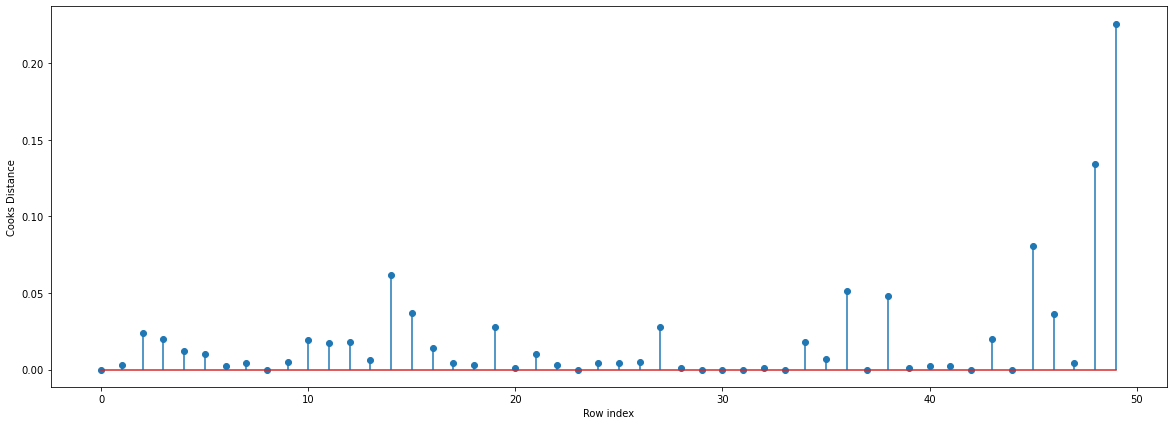

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#Exclude variable "Administration" and generate R-Squared and AIC values
startup_data_adm= smf.ols('Profit~MarSpend+RDspend+State_California+stateNew_york+State_Florida',data = startup_data).fit()

In [27]:
(startup_data_adm.rsquared,startup_data_adm.aic)

(0.950453304509085, 1061.067741856422)

In [28]:
#Exclude variable "RD_Spend" and generate R-Squared and AIC values
startup_data_rds= smf.ols('Profit~MarSpend+Administration+State_California+stateNew_york+State_Florida',data = startup_data).fit()

In [29]:
(startup_data_rds.rsquared,startup_data_rds.aic)

(0.6131075019799208, 1163.8293070259358)

In [30]:
model_influence_adm=startup_data_adm.get_influence()
(c_adm,_)=model_influence_adm.cooks_distance

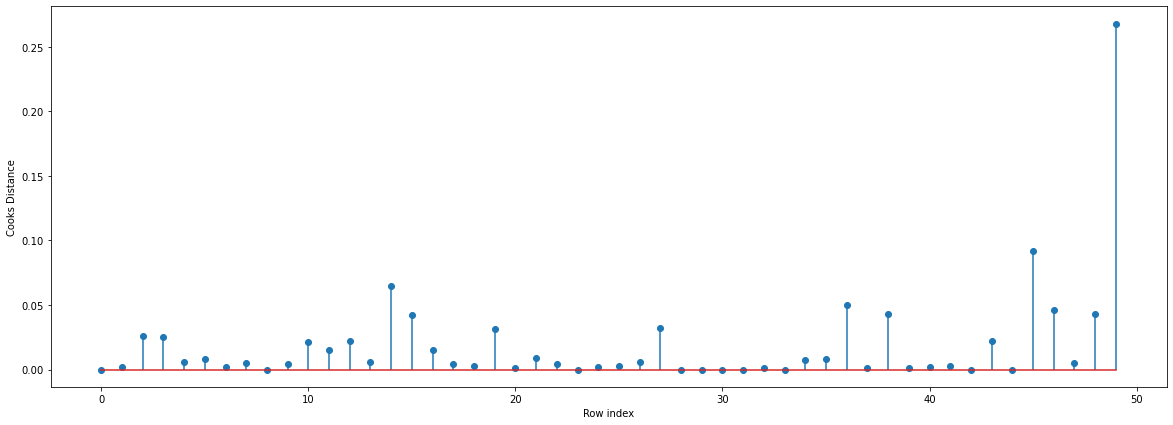

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_data)), np.round(c_adm, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#check the accuracy of model
(startup_data_adm.rsquared,startup_data_adm.aic)

(0.950453304509085, 1061.067741856422)